# ECE657A Homework 4
## Juan Manuel Gomez Gonzalez

Python 3.7 was used for this homework, in Windows 10 using Anaconda, Visual Studio Code and Jupyter Notebook. The pandas, numpy, and matplotlib libraries for Python were used.

The Pandas 10 minute tutorial, Pandas Cheat Sheet and Pandas CookBook were used to learn how to use the basic functions of Pandas. These documents can be obtained from [1]. Numpy’s statistical and linear algebra functions were also used, and their information can be seen in [2] and [3], respectively. Matplotlib’s API guide [4] was used for the plotting component of the homework.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #Import python's warnings library
warnings.simplefilter('ignore') #Disable the warnings for better visibility of the notebook

plt.style.use('seaborn-darkgrid')

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The dataset, obtained from [5], contains information about a marketing campaign of a portuguese bank. The campaign consisted of one or multiple phone calls to different clients, in order to see if the client was interested in a product offered by the bank.

In [2]:
df_bank_full = pd.read_csv('bank-additional-full.csv', sep = ';')
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

When the dataset is opened using a text reading application or Pandas, it can be seen that it is a CSV file separated by semicolons instead of commas. It contains 21 columns or attributes, both numerical and categorical, and contains 41188 rows of data.

In [3]:
df_bank_full.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In the dataset's attribute information found in [5], it is mentioned that the variable named duration should only be used for benchmarking purposes as it is information learnt after calling and not before the call, and thus should be discarded if the intention is trying to create a realistic predictive model.

In [4]:
df_bank=df_bank_full.drop(columns = 'duration')
df_bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

The unknown values can be replaced with numpy's NaN so that Panda's information method can count the amount of null values in each attribute

In [5]:
df_bank.replace(to_replace = 'unknown', value = np.nan).info() #Show the number of missing values in each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


Attributes that are non-continuous or that have no inherent distance between their points, like job, marital status, or contact should be disregarded.

In [6]:
df_bank_untrimmed=df_bank.copy() #Make a copy of the DF
#Drop the attributes that are not interesting right now:
df_bank=df_bank.drop(columns=['job', 'marital', 'contact', 'month', 'day_of_week']) 

Unknown values can be replaced with the mode of the attribute, to avoid losing information:

In [7]:
df_bank = df_bank.replace(to_replace = 'unknown', value=df_bank.mode()) #Replace 'unknown' with the mode
df_bank.head()

age    education default housing loan  campaign  pdays  previous  \
0   56     basic.4y      no      no   no         1    999         0   
1   57  high.school      no      no   no         1    999         0   
2   37  high.school      no     yes   no         1    999         0   
3   40     basic.6y      no      no   no         1    999         0   
4   56  high.school      no      no  yes         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed   y  
0       5191.0  no  
1       5191.0  no  
2       5191.0  no  
3       5191.0  no  
4       5191.0  no

The target values should be separated from the dataset attributes

In [8]:
df_X = df_bank.iloc[:,:-1] #Create the X array
y = df_bank.loc[:,'y'].values #Create the target array

Dummy variables or one hot encoding can be used to convert the categorical variables into numerical variables. Label encoding can also be used. In this case the label encoding will be used as it creates less columns to plot and compare.

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #Create an encoder
#Create a dictionary with each of the education types and its respective value
education = {"illiterate":0, "basic.4y":1,"basic.6y":2, "basic.9y":3, "high.school":4,
             "professional.course":5, "university.degree":6}
df_X['education'] = df_X['education'].map(education)

#Encode the rest of the attributes:
for i in ['default', 'housing', 'loan', 'poutcome']:
    df_X[i] = label_encoder.fit_transform(df_X[i])
df_X.head()

age  education  default  housing  loan  campaign  pdays  previous  \
0   56          1        0        0     0         1    999         0   
1   57          4        0        0     0         1    999         0   
2   37          4        0        1     0         1    999         0   
3   40          2        0        0     0         1    999         0   
4   56          4        0        0     1         1    999         0   

   poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         1           1.1          93.994          -36.4      4.857   
1         1           1.1          93.994          -36.4      4.857   
2         1           1.1          93.994          -36.4      4.857   
3         1           1.1          93.994          -36.4      4.857   
4         1           1.1          93.994          -36.4      4.857   

   nr.employed  
0       5191.0  
1       5191.0  
2       5191.0  
3       5191.0  
4       5191.0

The resulting columns can be plotted using Seaborn's pairplot to see the effects each pair of attributes has on the outcome of the dataset:

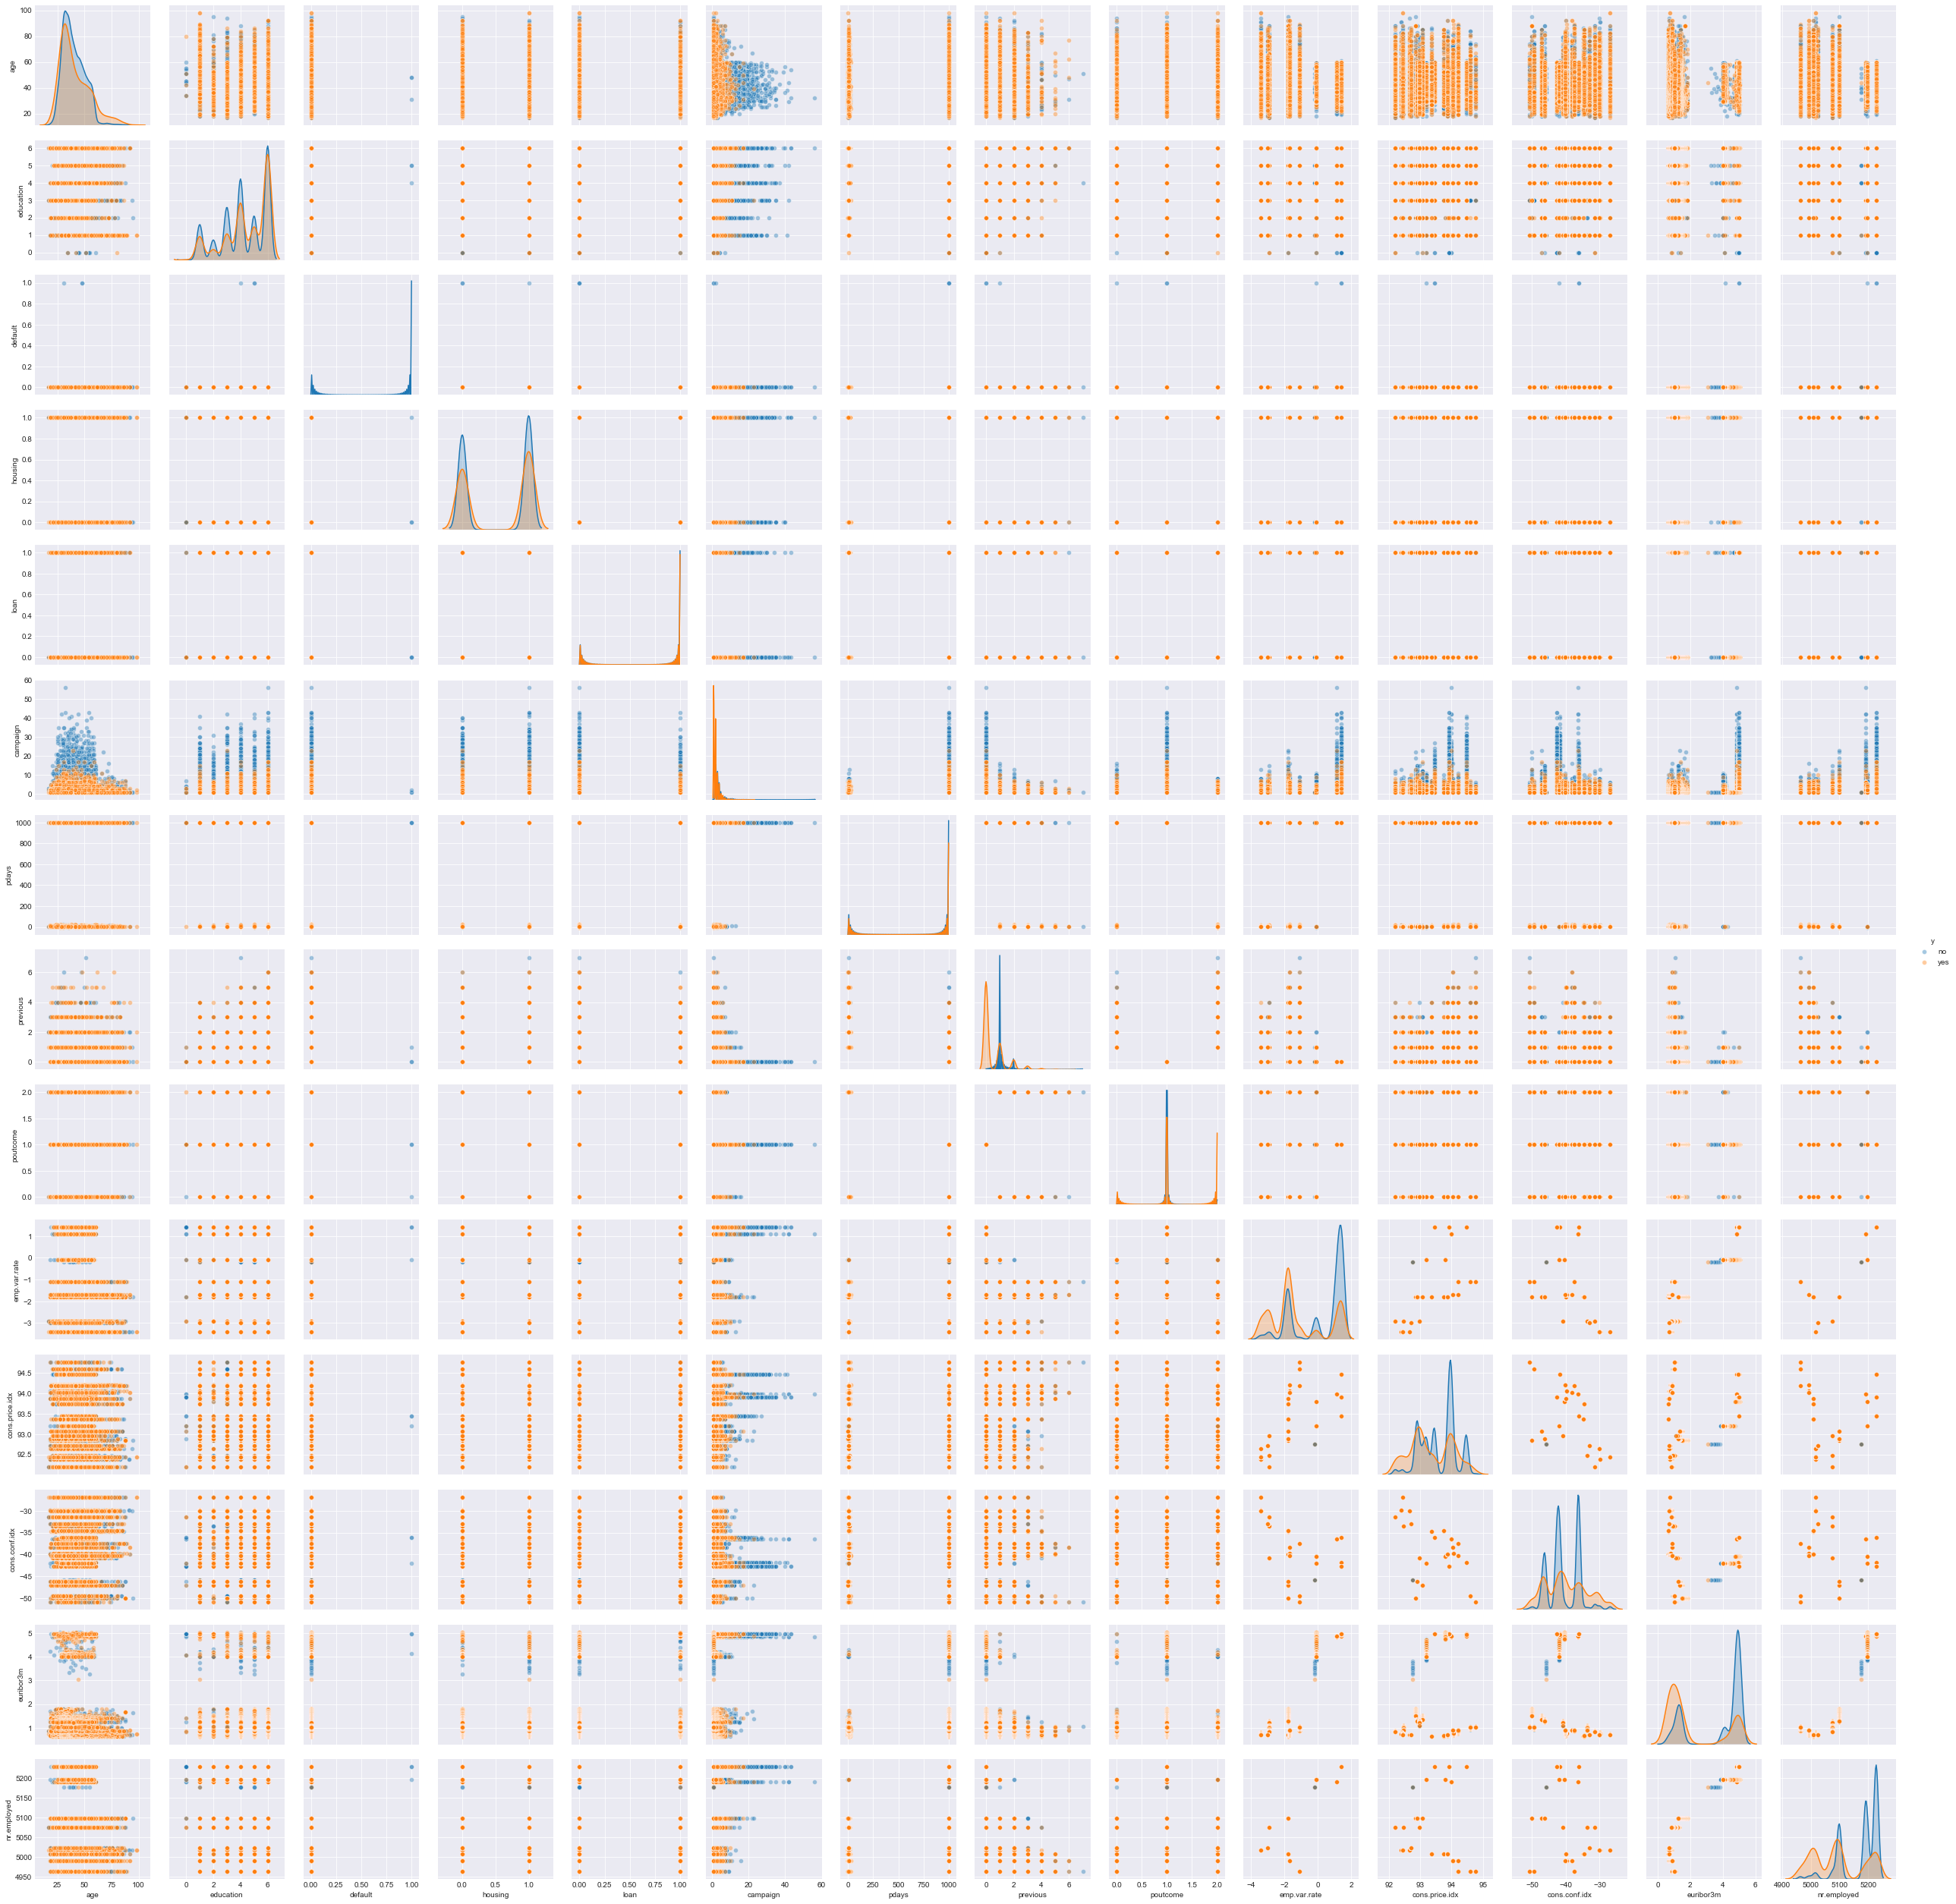

In [10]:
#Plot all of the attributes against each other:
sns.pairplot(pd.concat([df_X, df_bank.loc[:,'y']], axis=1), hue='y', plot_kws=dict(alpha=0.4)) 

The data should be split in a train and test datasets so as to have a mean of validating that what the classifier fit is accurate. This can be done using the train_test_split function of Sklearn. The test size was decided to be 20% as it is a large dataset (more than 45000 samples) and it was considered a good option to have the split stratified as there are more 'no' answers than 'yes' answers and it would unbalance more the classifier if the data was split in a way that would not represent correctly the entirety of the dataset. This also coincides with Pareto's principle that indicates that 80% of a dataset's variance can be explained by 20% of its data.

In [11]:
from sklearn.model_selection import train_test_split
#Split the data into a test and train sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(df_X.values, y, test_size = 0.2, stratify = y)

A split value of 20% for the train and test sets was selected, as the dataset seems to be large enough for it to be adequate for the test of the classifiers.
The values need to be normalized as each column has its own range. This can be done using Sklearn's StandardScaler().

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Create a scaler instance
X_train = sc.fit_transform(X_train) #Fit and transform the tran set
X_test = sc.transform(X_test) #Transform the test set

## kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=2, n_neighbors = 5, n_jobs=-1) #Create a kNN classifier using 5 neighbors
classifier.fit(X_train, y_train) #Fit the classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Now that the classifier has been created, it can be used to predict the y values of the test set:

In [14]:
# Predicting the Test set results
y_predict = classifier.predict(X_test)

The classification scores can be obtained using Scikitlearn's classification_report method:

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print('The accuracy is : ' + str(round(accuracy_score(y_test, y_predict),2))) #Print the accuracy
print('Classification report for test set for KNN:')
print(classification_report(y_test, y_predict)) #Print the classification report

#If the confusion matrix is desired too:
#from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred) #Creates the confusion matrix
#print(cm)

The accuracy is : 0.89
Classification report for test set for KNN:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.53      0.28      0.36       928

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238



The accuracy for the classifier can be considered good. The classification report values for the no class seem apt for the classifier to be considered good, but the yes class had an average to bad score. This can possibly be explained by the unbalance in the samples of the dataset, as the ratio in the test sample seems to be almost 8 to 1 and KNN tends to bias towards the class with more samples. A solution to this problem could be undersampling the no class or oversampling the yes class.

The predicted values can be plotted using the same Seaborn function used previously on the homework. First the test data can be plotted:

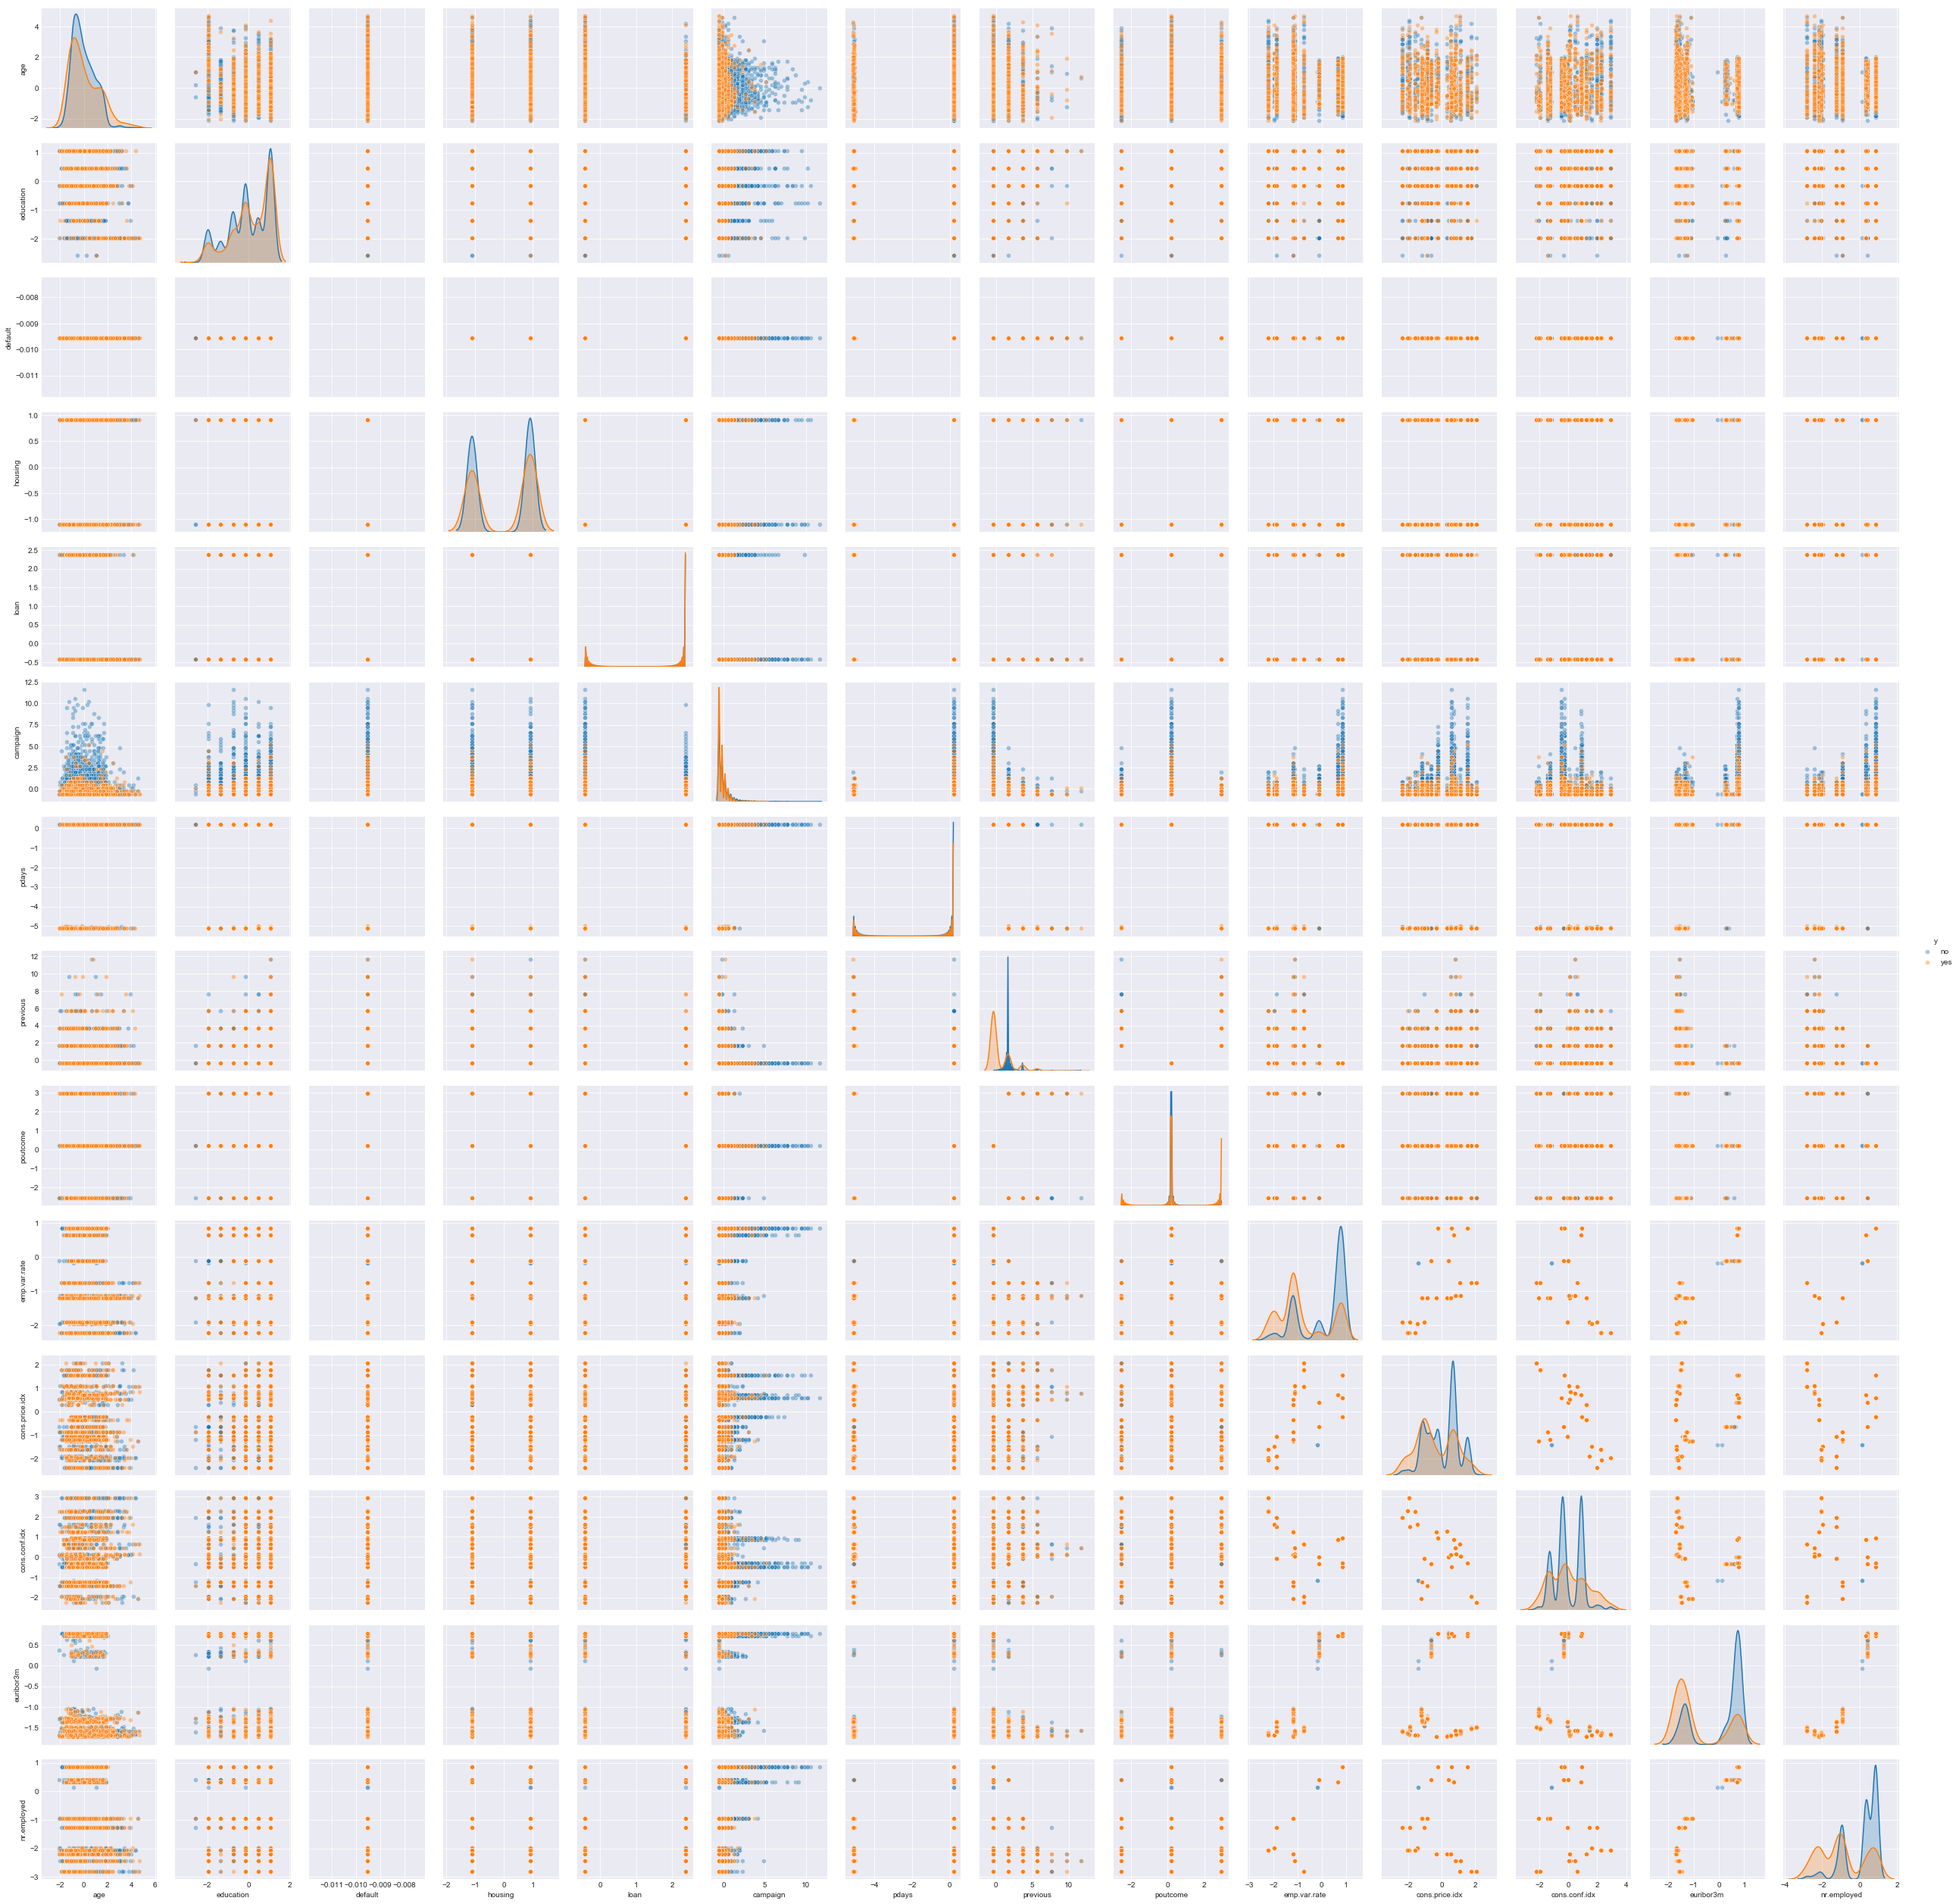

In [16]:
df_rec = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1) #Recreate the array for plotting
df_rec.columns = df_bank.columns #Get the column names
sns.pairplot(df_rec, hue = 'y', plot_kws=dict(alpha=0.4)) #Plot the array

The predicted data can be seen next:

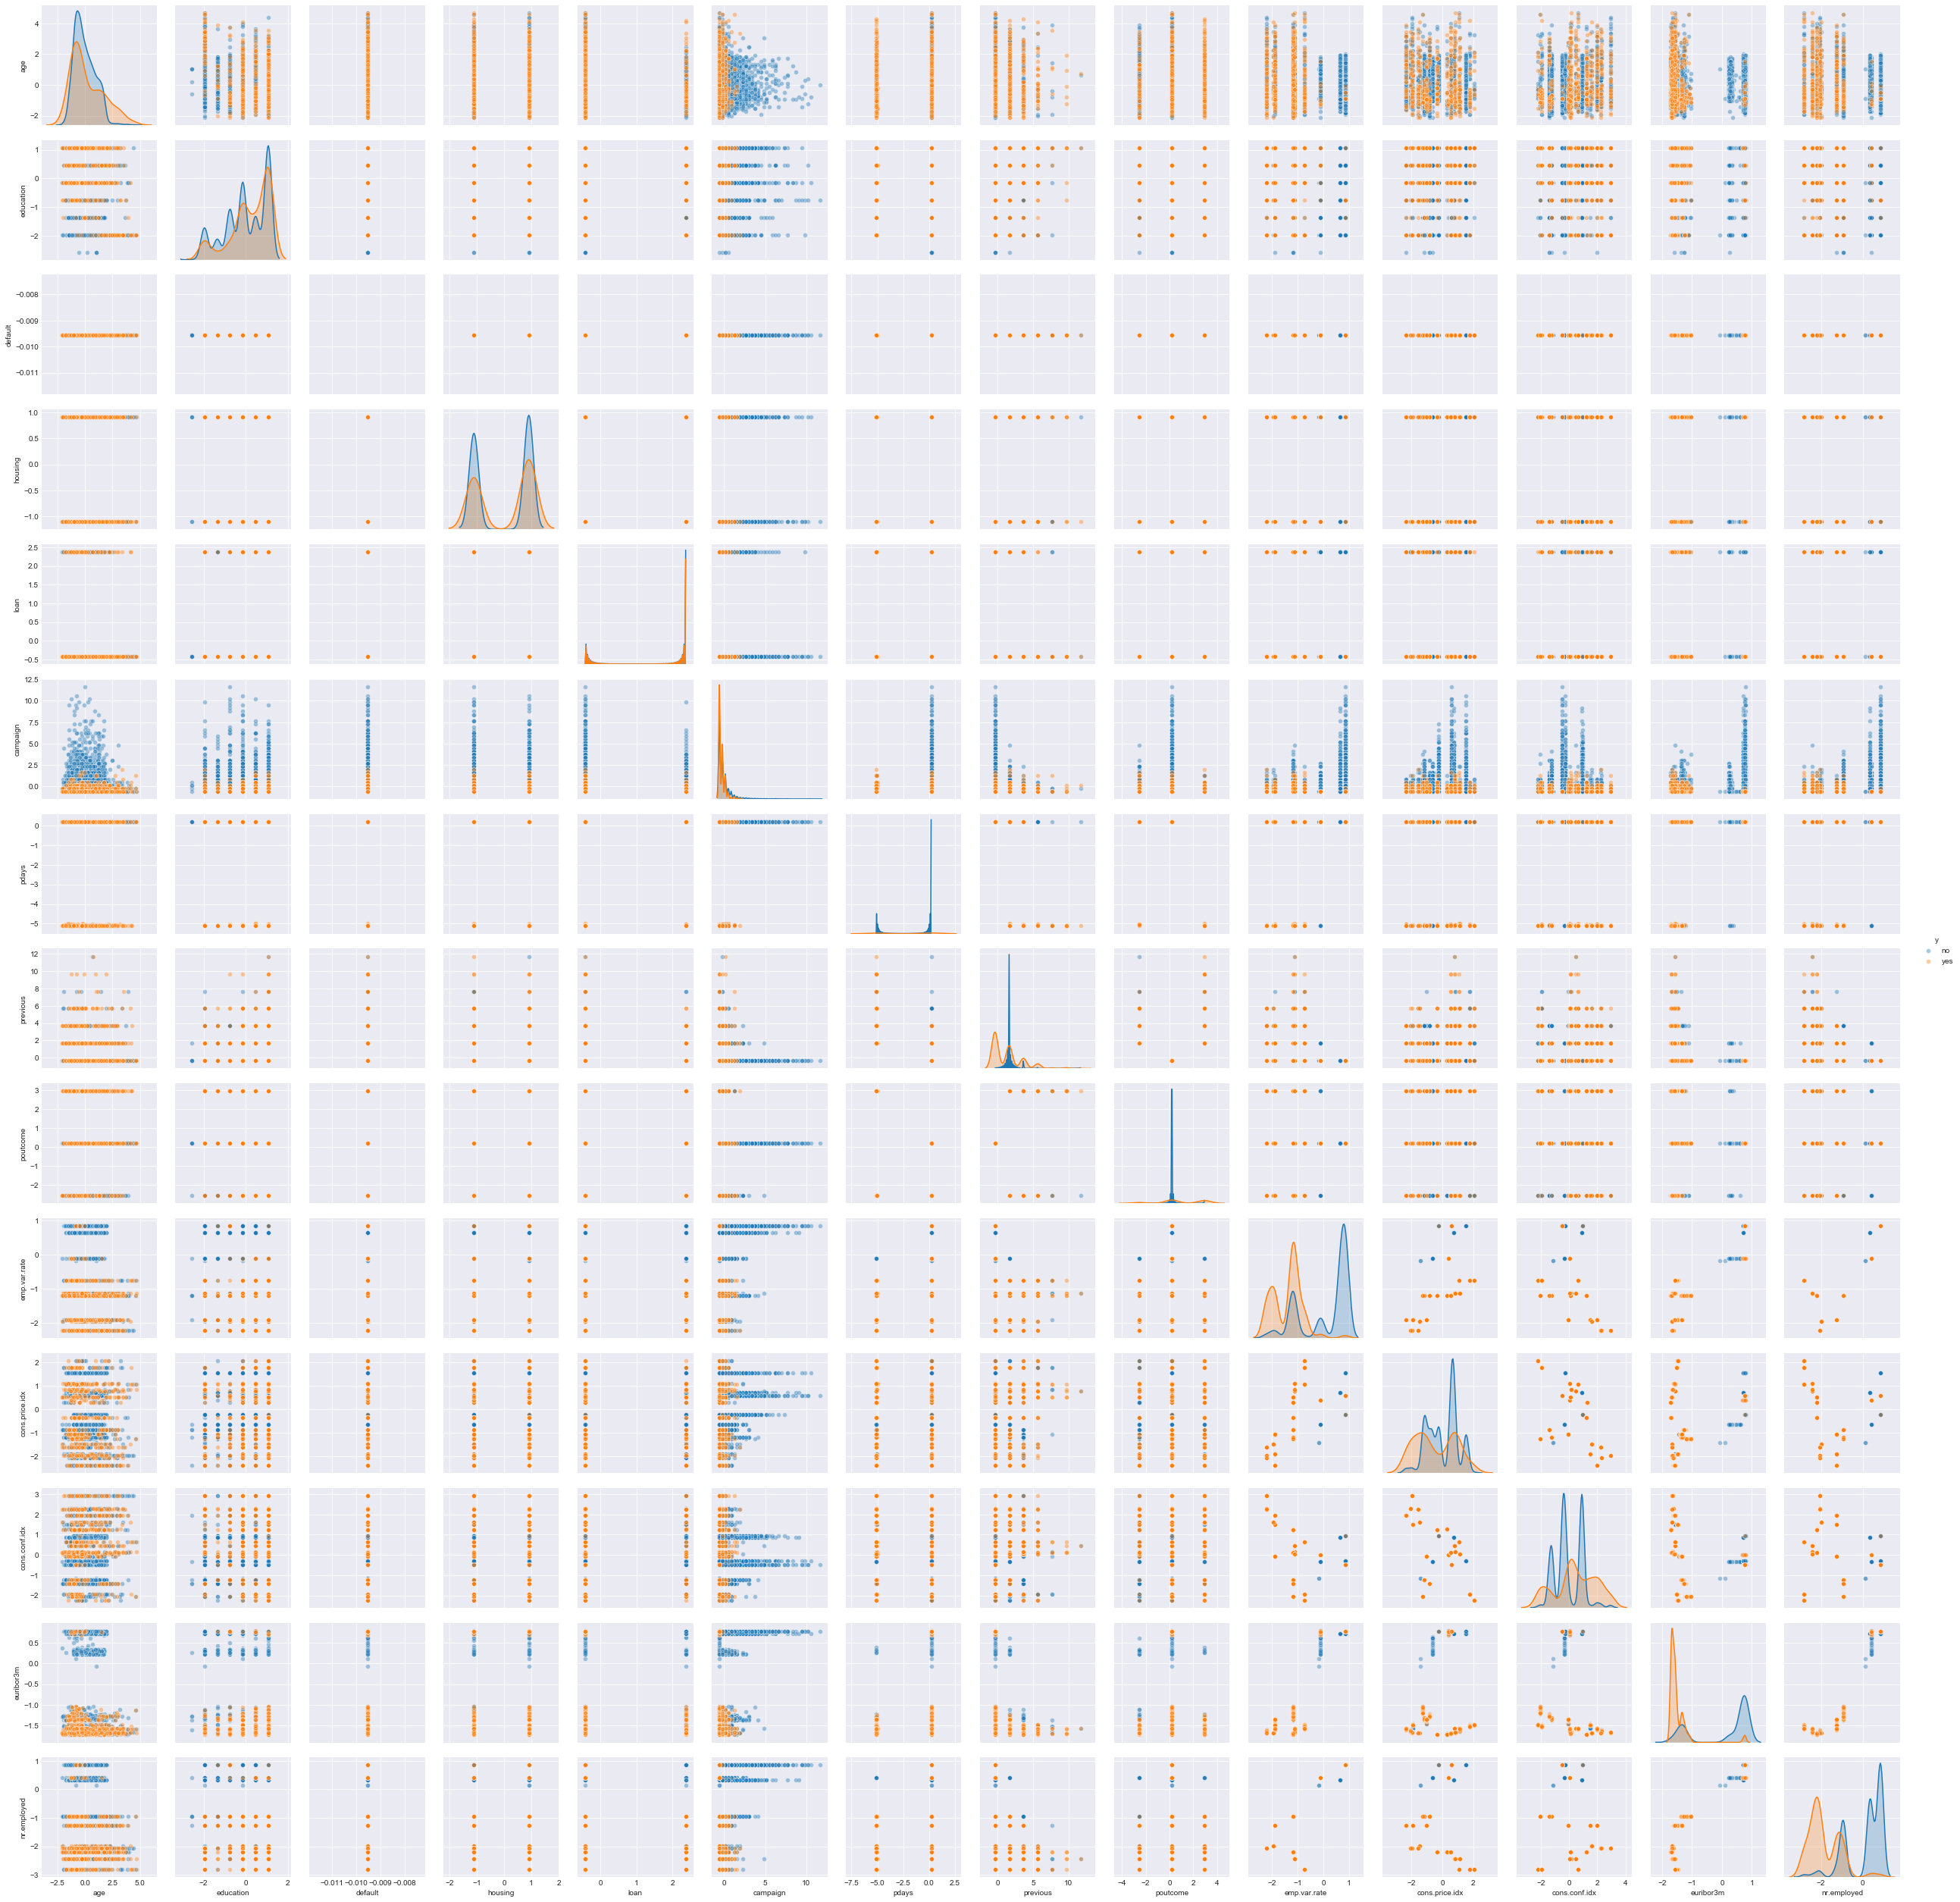

In [17]:
df_knn = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis=1) #Recreated dataframe
df_knn.columns = df_bank.columns #Rename the columns
sns.pairplot(df_knn, hue = 'y', plot_kws=dict(alpha=0.4)) #Plot using Seaborn

Campaign seems to be the attribute which brings the biggest possibility of a clear separation between the two classes, especially when it is compared with age, education or possibly "emp.var.rate".
The plot for campaign versus age and campaign versus education can be seen next:

In [18]:
def plt_creation(df, xplot_val, yplot_val, class_val):
    pp = sns.pairplot(data=df, 
                  x_vars=xplot_val, 
                  y_vars=yplot_val, 
                  size=10,
                  hue=class_val,
                  palette={"no": "blue", "yes": "orange"},
                  plot_kws=dict(alpha=0.4))

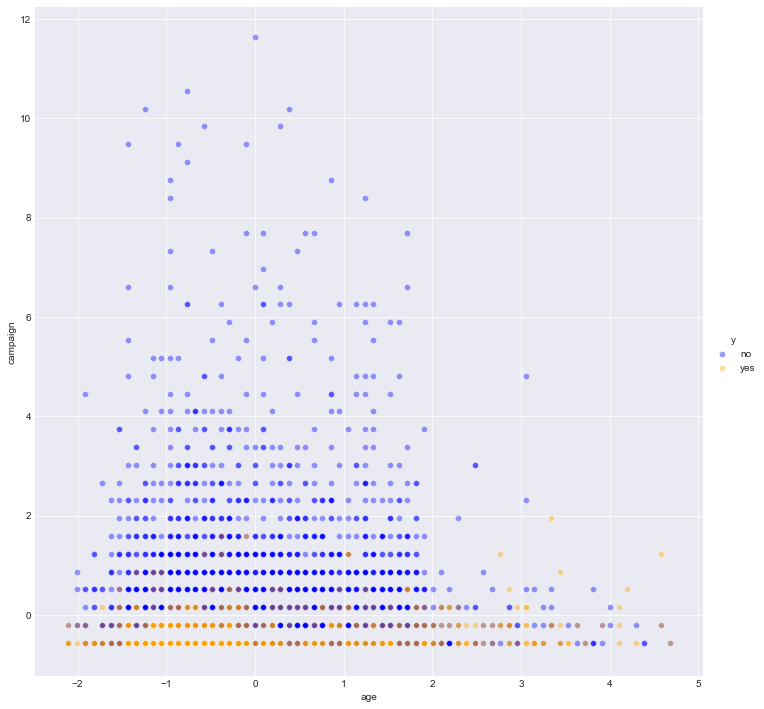

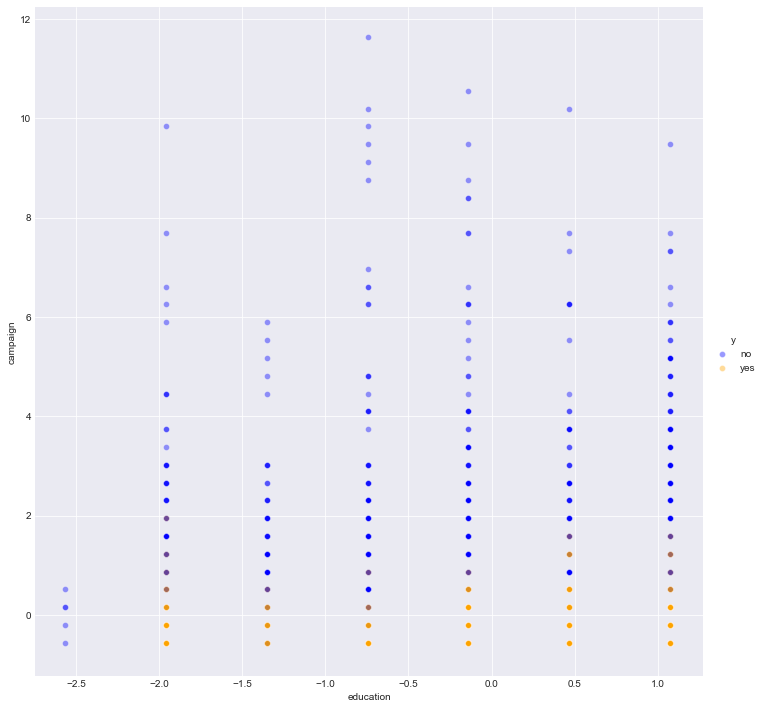

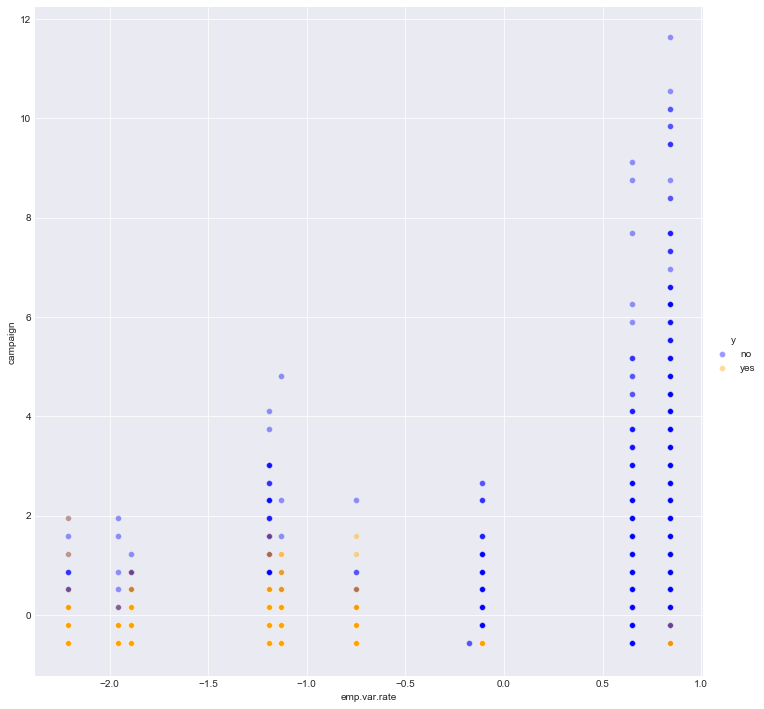

In [19]:
plt_creation(df_knn,'age', 'campaign', 'y')
plt_creation(df_knn,'education', 'campaign', 'y')
plt_creation(df_knn,'emp.var.rate', 'campaign', 'y')

It seems that there is no possibility for making a hard discrimination between both classes, even in age or education. However, it is possible to consider a threshold for both age and education, as it seems that the higher the campaign value for those two attributes the higher the chance that the person will say no.

## Linear Support Vector Machine
Scikitlearn also has a function for creating a Support Vector Machine (SVM) using the Support Vector Classification (SVC) function. The creation and prediction of the test values with an SVM using a linear kernel can be seen below.

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear') #Create a linear SVM
classifier.fit(X_train, y_train) #Train the SVM

# Predicting the Test set results
y_predict = classifier.predict(X_test)

The SVM's classification report can also be obtained using the classification_report function:

In [21]:
print('The accuracy is : ' + str(round(accuracy_score(y_test, y_predict),2))) #Print the accuracy
print('Classification report for test set for Linear SVM:')
print(classification_report(y_test, y_predict)) #Print the classification report

The accuracy is : 0.9
Classification report for test set for Linear SVM:
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7310
         yes       0.63      0.20      0.30       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



The conclusions obtained when using the KNN classifier apply in the SVM as well. The no samples seem to bias the classifier to predict no most of the time.
The predicted values can also be plotted like with KNN:

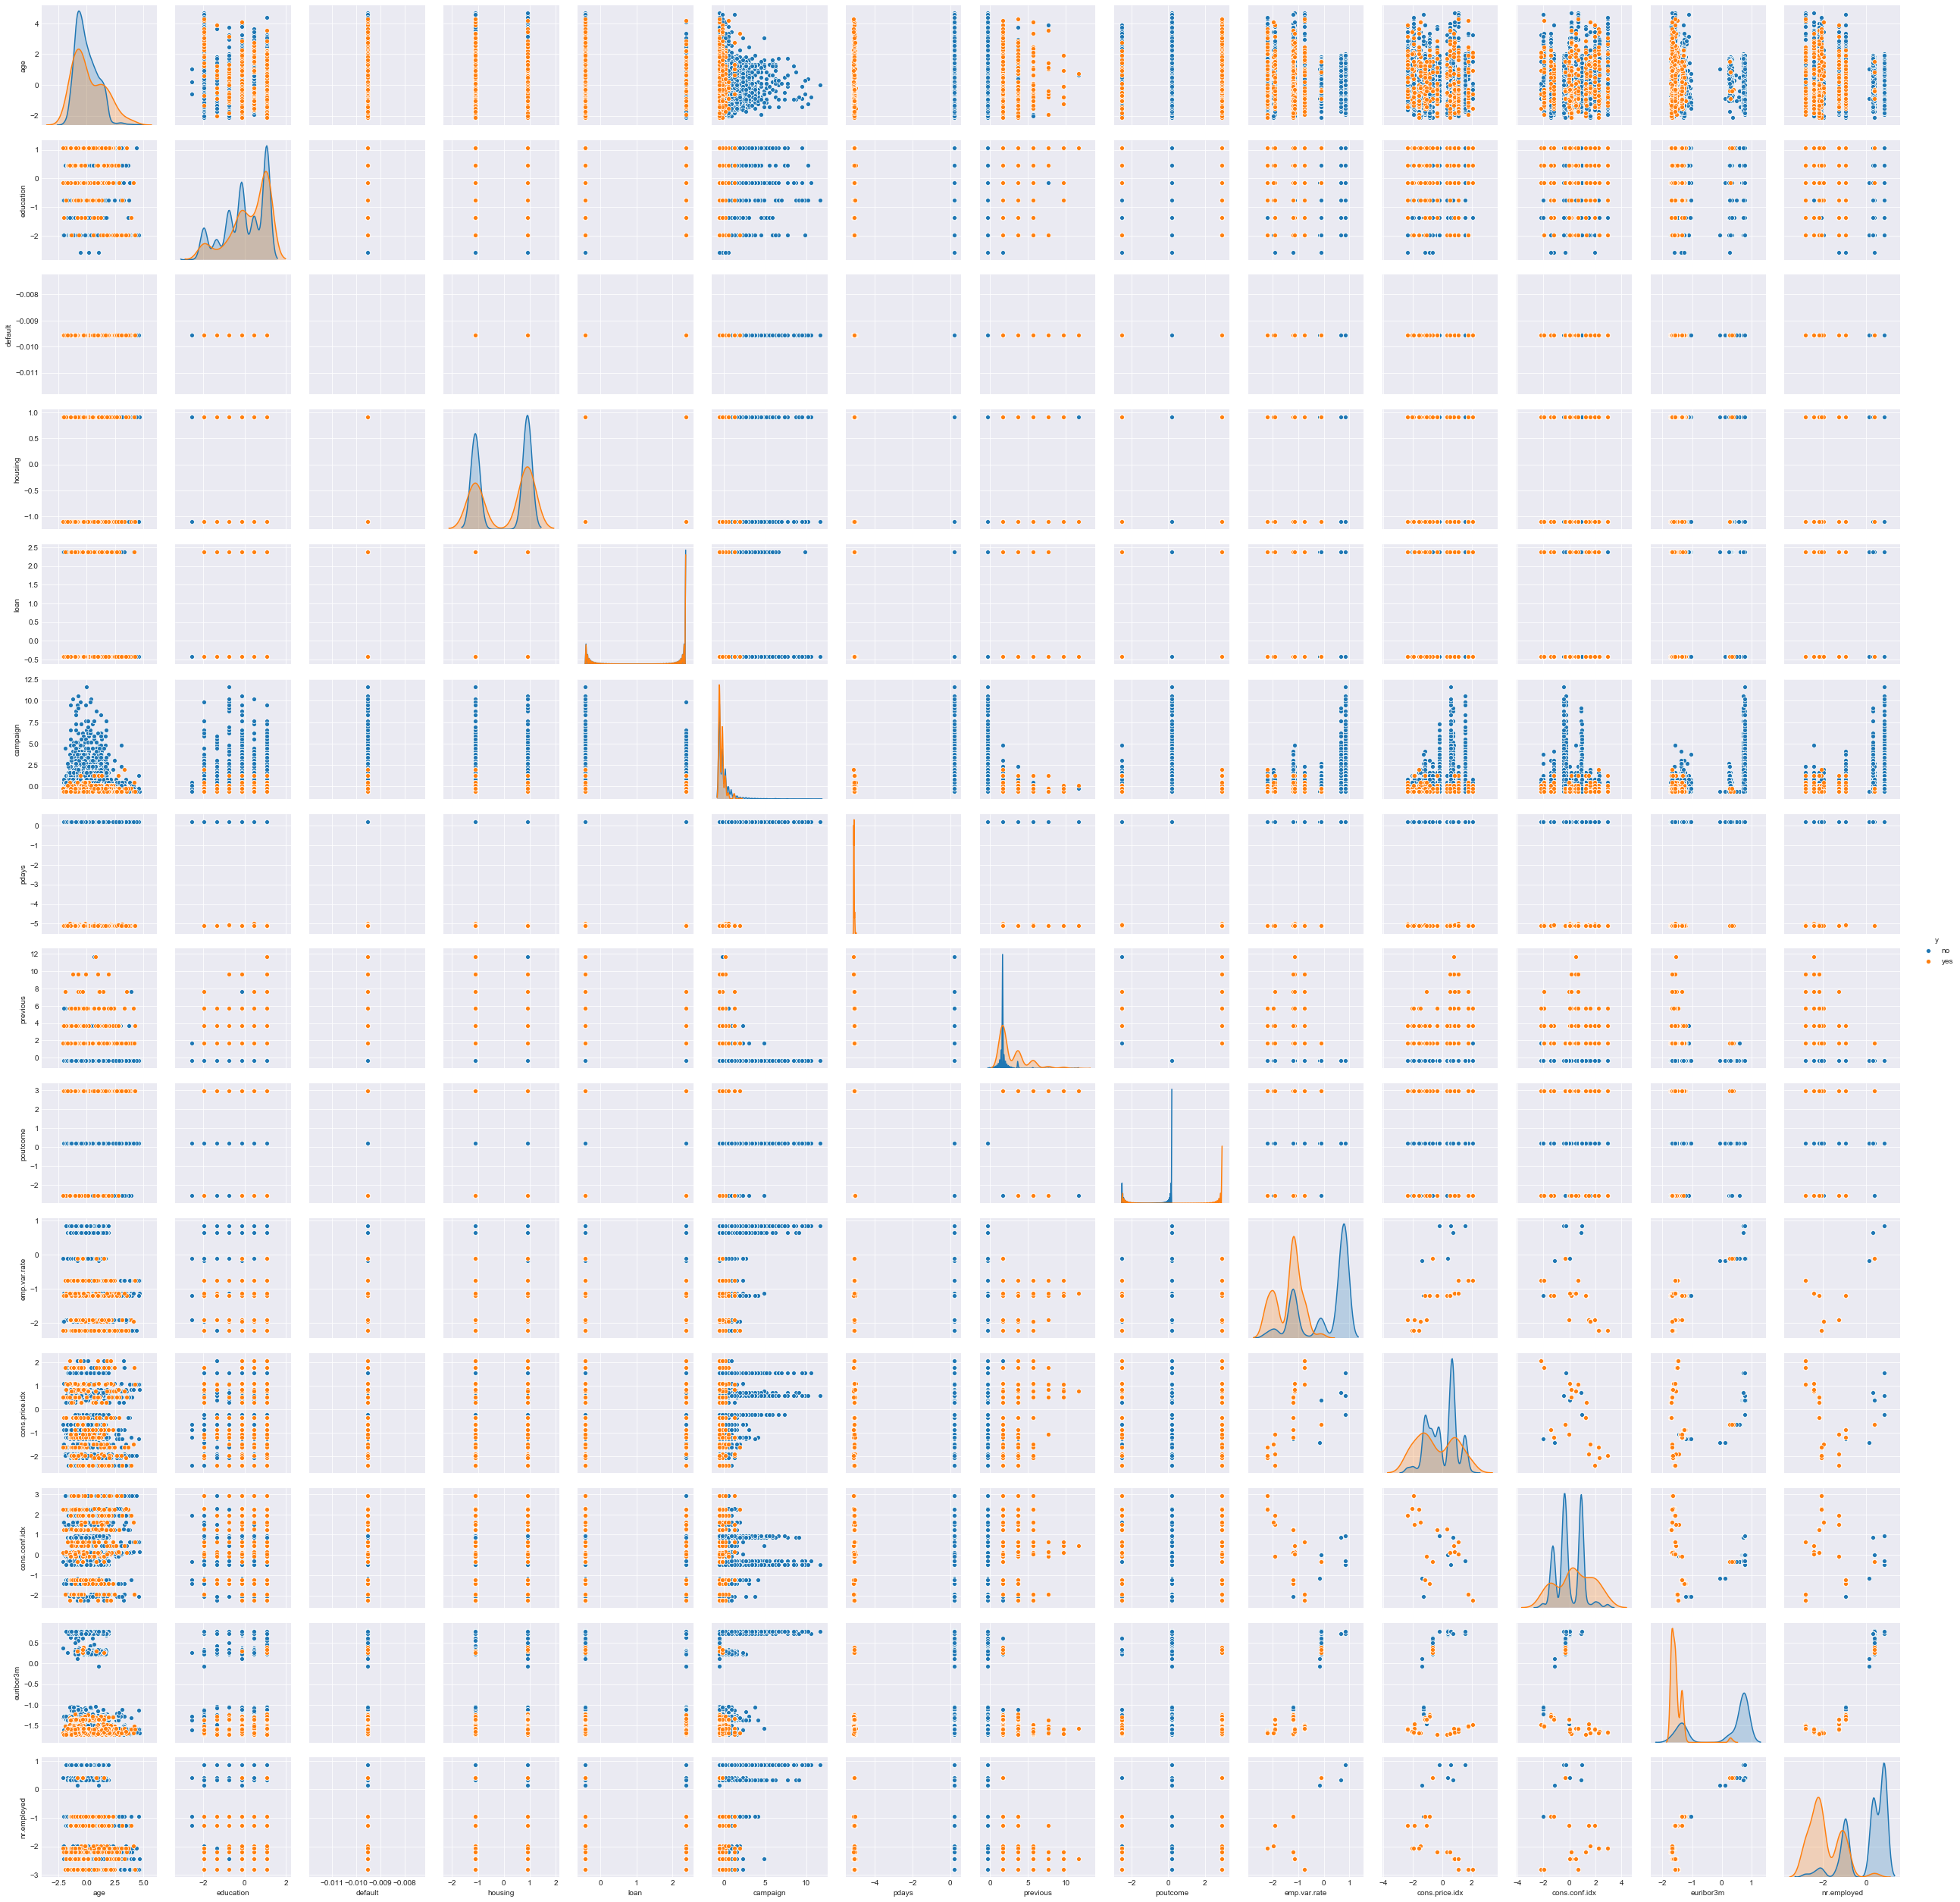

In [22]:
df_lin_svm = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis=1) #Concatenate the test and predicted arrays
df_lin_svm.columns = df_bank.columns #Get the column names for the new DataFrame
sns.pairplot(df_lin_svm, hue = 'y') #Plot the new DataFrame

In this plot, campaign seems to also have discernible patterns in age and education, similar to the ones found in kNN.

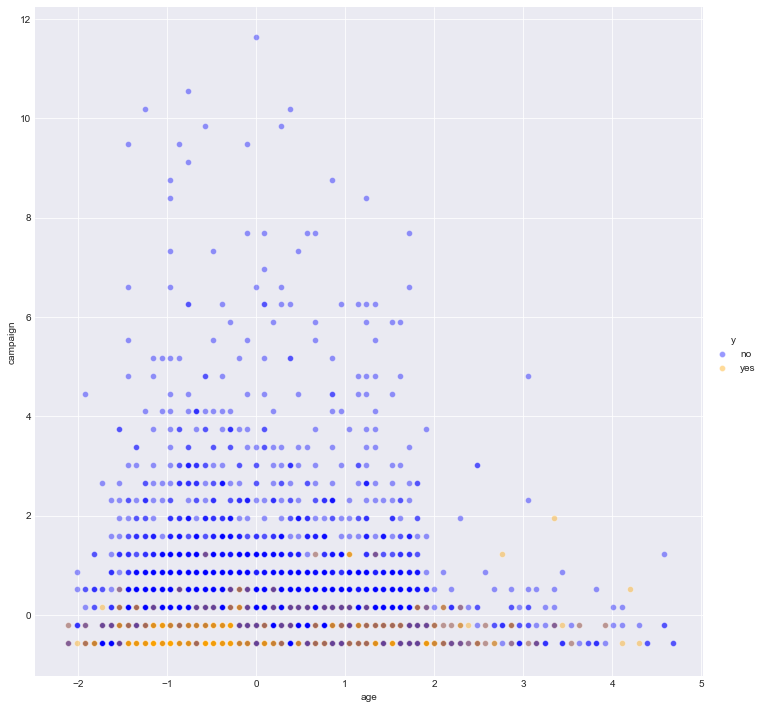

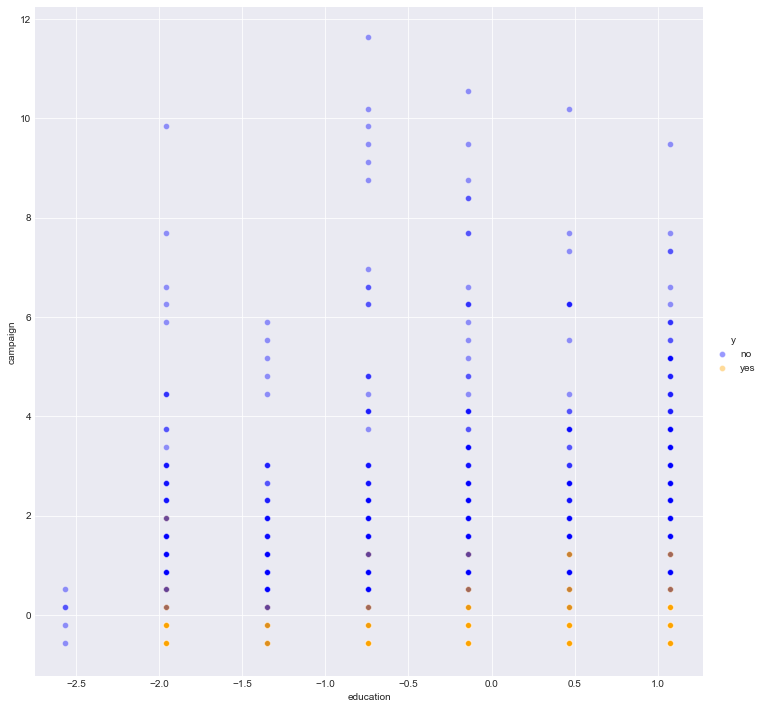

In [23]:
plt_creation(df_lin_svm,'age', 'campaign', 'y') #Create a scatterplot for the age and campaign attributes
plt_creation(df_lin_svm,'education', 'campaign', 'y') #Create a scatterplot for the education and campaign attributes

Again, there does not seem to be a clear difference between the yes and no classes, as where there are yes values it is also possible to find no values. A solution to this problem could be the use of a SVM that maps to a higher dimension by the use of a kernel, e.g. using a RBF kernel SVM.

## Radial Basis Function (RBF) Support Vector Machine
An SVM with an RBF kernel can also be created using Scikitlearn's SVC classifier, as shown below.

In [24]:
classifier = SVC(kernel = 'rbf') #Create an RBF classifier
classifier.fit(X_train, y_train) #Fit the classifier

# Predicting the Test set results
y_predict = classifier.predict(X_test)

In [25]:
print('The accuracy is : ' + str(round(accuracy_score(y_test, y_predict),2))) #Print the accuracy
print('Classification report for test set for RBF SVM:')
print(classification_report(y_test, y_predict)) #Print the classification report

The accuracy is : 0.9
Classification report for test set for RBF SVM:
              precision    recall  f1-score   support

          no       0.90      0.99      0.95      7310
         yes       0.70      0.18      0.29       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



Again, the lesser amount of yes values seem to have skirted the scores and biased the classifier into trying to always return a no as a prediction. Nonetheless, the precision presented an increase yet the recall and the f1-score seems to have lowered for that yes class. 

Another possibility can be that the classifier is too complex and thus has too many attributes, and therefore a simpler approach should also be considered.

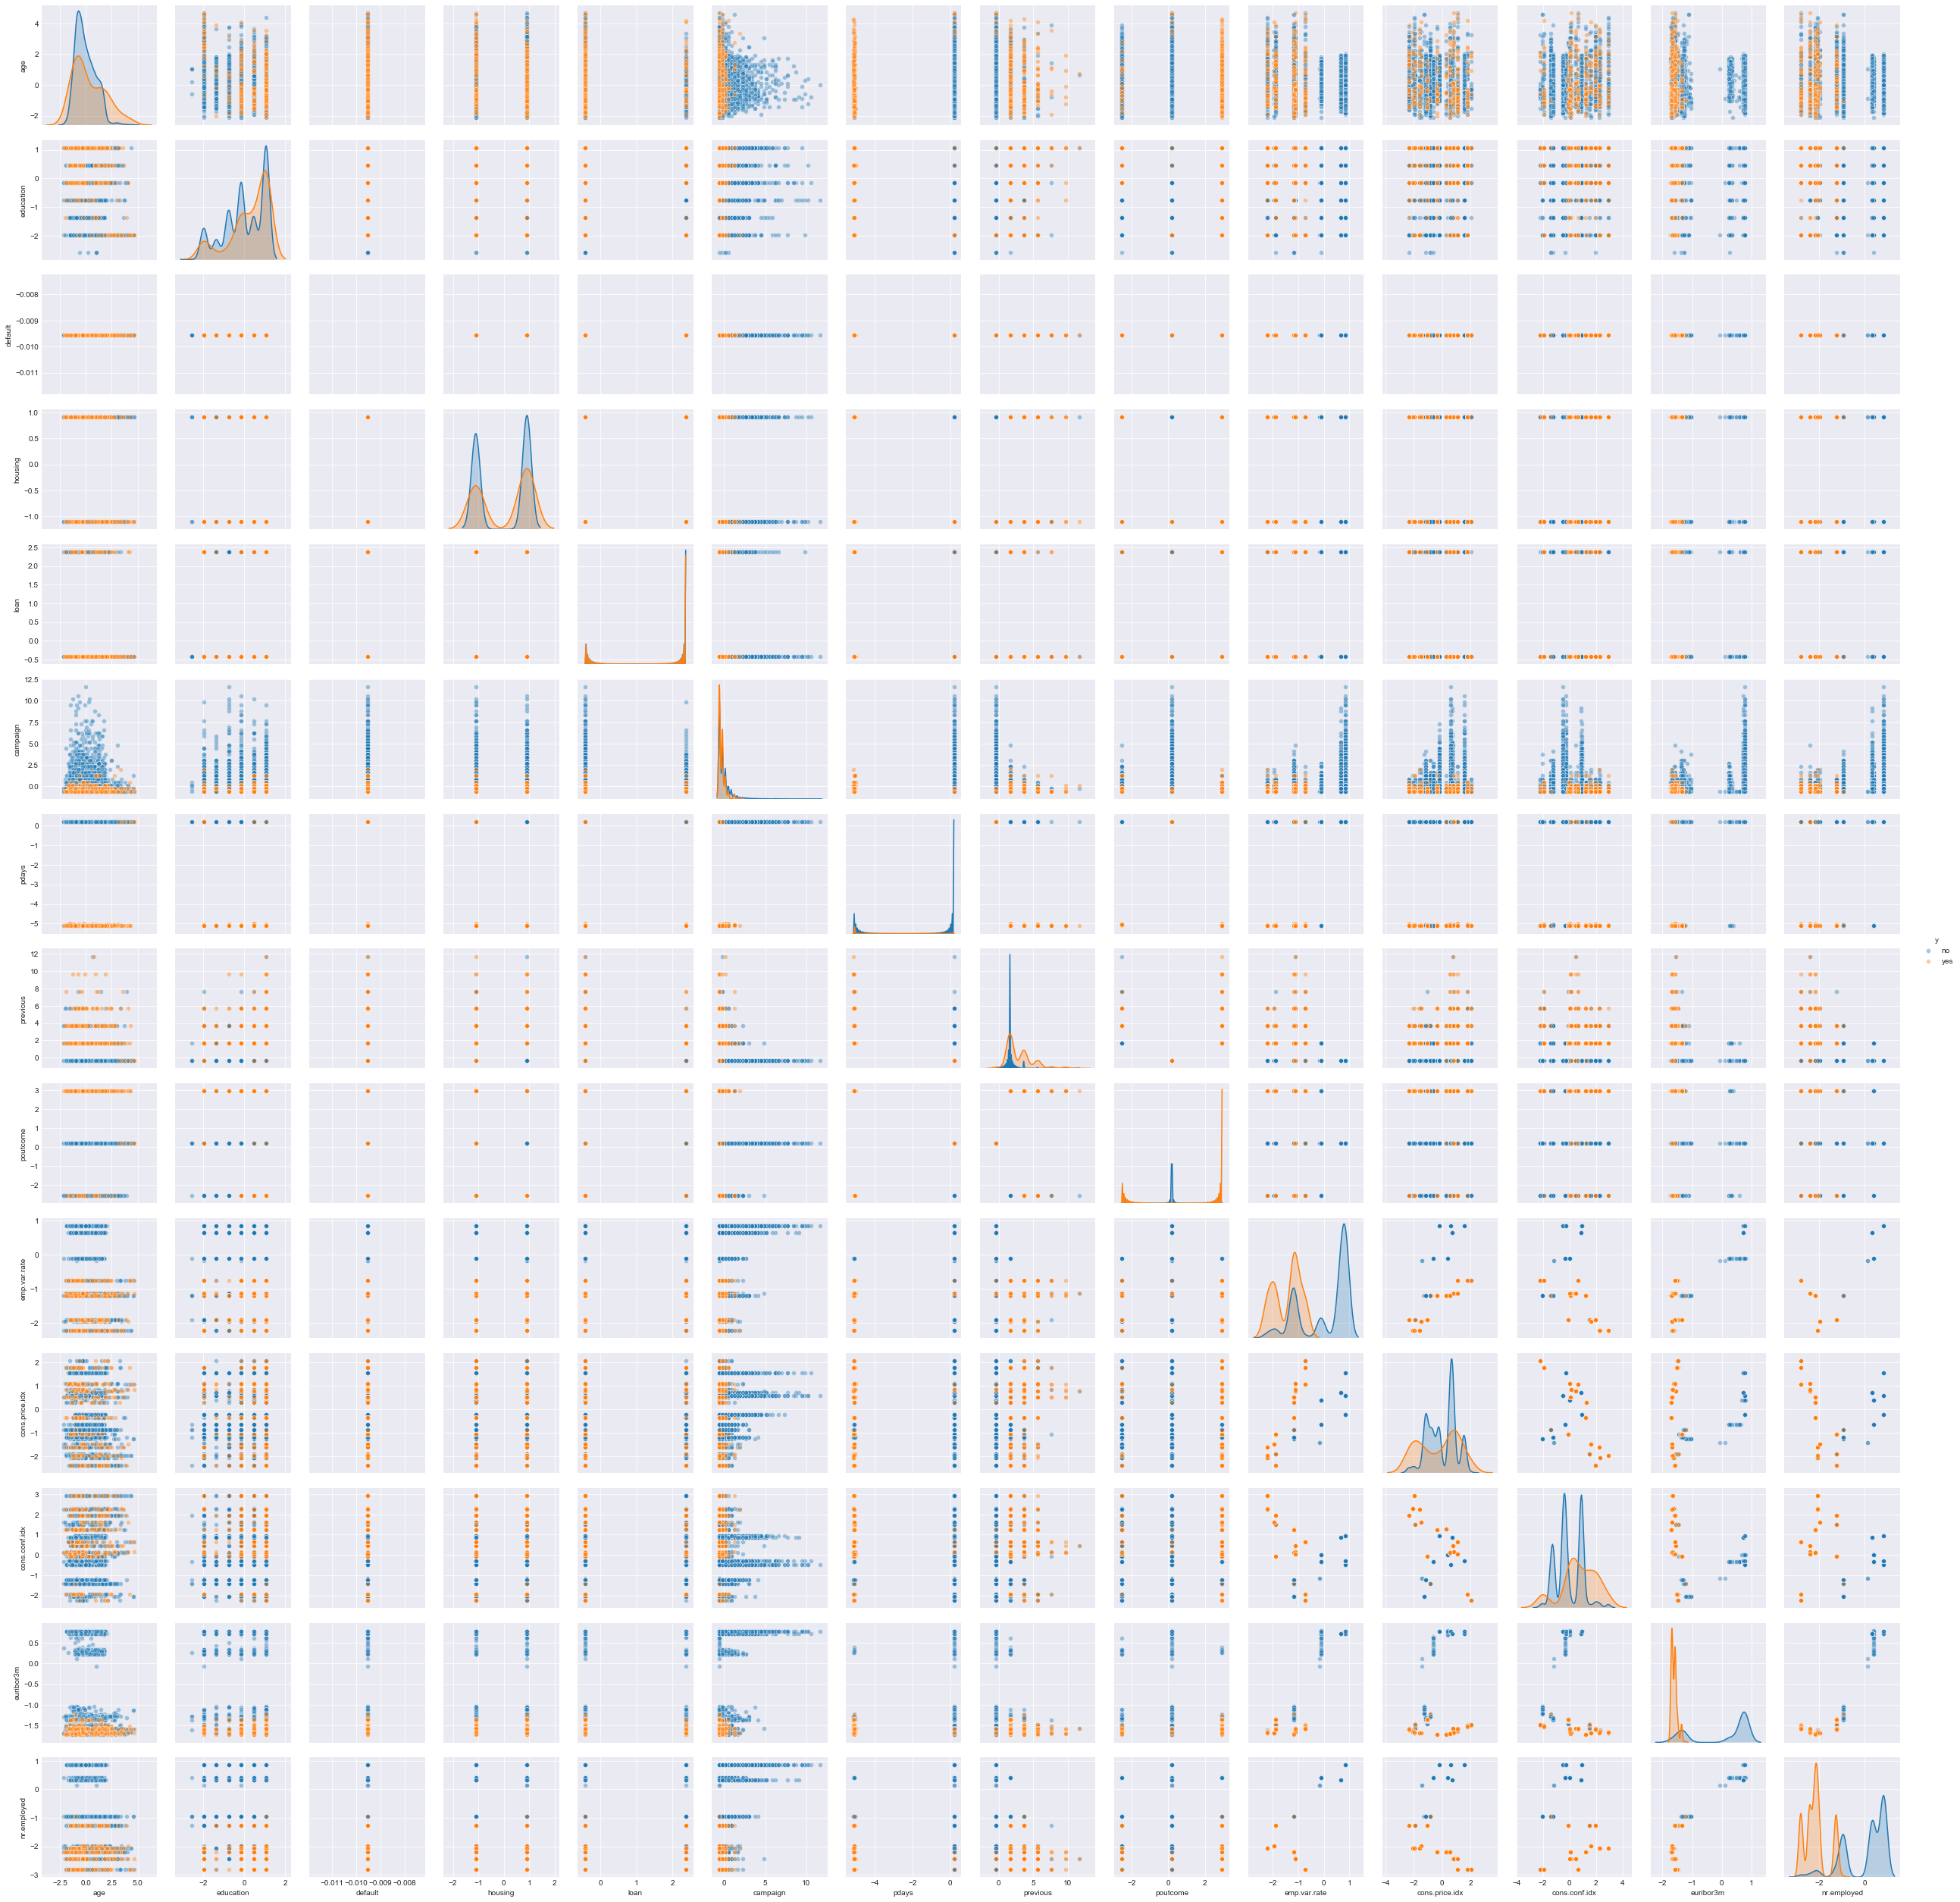

In [26]:
df_rbf_svm = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis = 1) #Concatenate the new DataFrame
df_rbf_svm.columns = df_bank.columns #Set the column names
sns.pairplot(df_rbf_svm, hue = 'y', plot_kws=dict(alpha=0.4)) #Plot the DataFrame

The campaign attribute is again the one that stands out as one of the columns in which is easier to separate both classes, especially in the age and education attributes.

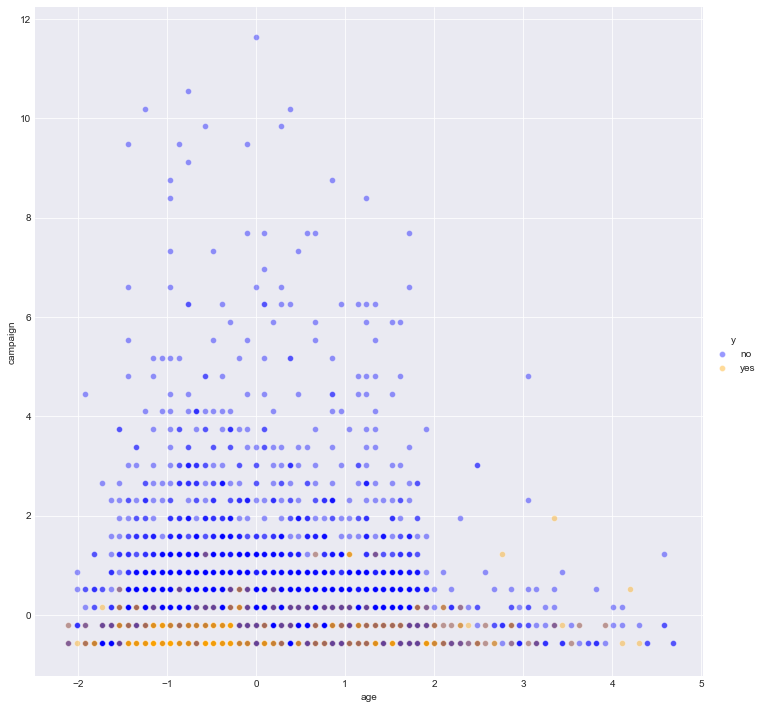

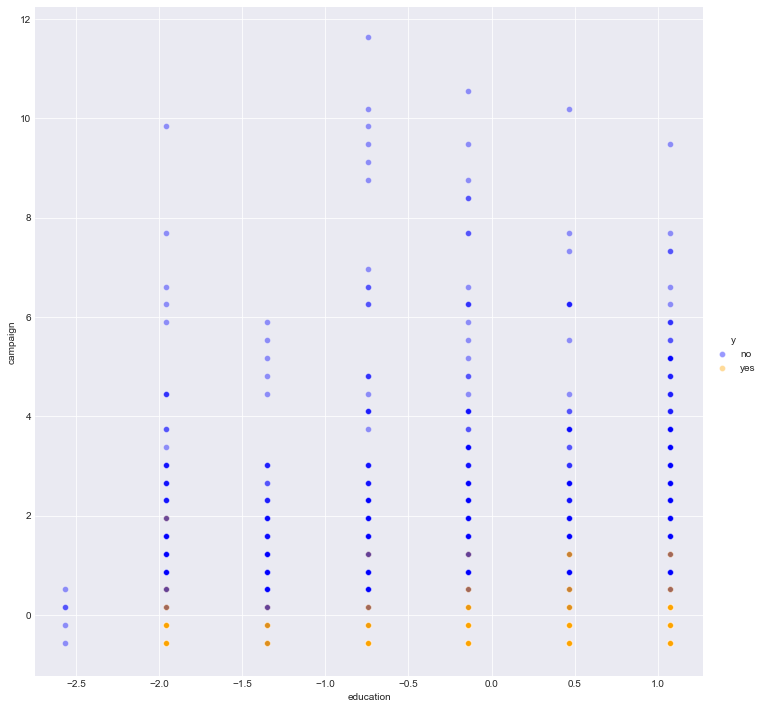

In [27]:
plt_creation(df_lin_svm,'age', 'campaign', 'y') #Create a scatterplot for the age and campaign attributes
plt_creation(df_lin_svm,'education', 'campaign', 'y') #Create a scatterplot for the education and campaign attributes

However there still does not seem to be a discernible separation between either of the yes and no classes besides the previously mentioned treshold.

The approach with only the numerical attributes (and thus excluding the categorical values) will now be considered as a way of trying to improve the classifier scores found previously on this homework.

In [28]:
#Reobtain dataset
df_bank = df_bank_untrimmed.copy()

#Drop non-needed information
df_bank = df_bank.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                              'month', 'day_of_week', 'poutcome'])

#Missing values replacement
df_bank = df_bank.replace(to_replace = 'unknown', value = df_bank.mode()) #Replace 'unknown' with mode
df_bank.head()

#Dataset attributes and target separation
df_X = df_bank.iloc[:,:-1]
y = df_bank.loc[:,'y'].values

#Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X.values, y, test_size = 0.2, stratify=y)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p = 2, n_neighbors = 5, n_jobs = -1)
classifier.fit(X_train, y_train)

# Predicting the Test set results for KNN
y_predict = classifier.predict(X_test)

#Import and create the classification report for kNN
from sklearn.metrics import classification_report
print('The accuracy for kNN is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for the test set of kNN:')
print(classification_report(y_test, y_predict))

# If plotting is desired for this part too:
# df_rec=pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
# df_rec.columns=df_bank.columns
# sns.pairplot(df_rec, hue='y')
# df_rec=pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis=1)
# df_rec.columns=df_bank.columns
# sns.pairplot(df_rec, hue='y')

#Linear kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting the Test set results for Linear SVM
y_predict = classifier.predict(X_test)

#Create the classification report for linear SVM
print('\nThe accuracy for Linear SVM is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for the test set of Linear SVM:')
print(classification_report(y_test, y_predict))

#Plot for linear SVM
# df_rec=pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis=1)
# df_rec.columns=df_bank.columns
# sns.pairplot(df_rec, hue='y')

#RBF SVM
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results for RBF SVM
y_predict = classifier.predict(X_test)

print('\nThe accuracy for RBF SVM is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for test the set of RBF SVM:')
print(classification_report(y_test, y_predict))

#Plot for RBF SVM
# df_rec=pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_predict)], axis=1)
# df_rec.columns=df_bank.columns
# sns.pairplot(df_rec, hue='y')

The accuracy for kNN is : 0.89
Classification report for the test set of kNN:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7310
         yes       0.54      0.31      0.39       928

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.73      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238


The accuracy for Linear SVM is : 0.9
Classification report for the test set of Linear SVM:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7310
         yes       0.64      0.22      0.33       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238


The accuracy for RBF SVM is : 0.9
Classification report for test the set of RBF SVM:
              precision    recall  f1-score   support

          no       0.91      0.99  

The classification reports indicate that the recall, precision and f1-score for the yes class increase for the linear SVM classifier, and thus can be assumed that the removal of the categorical values in this case would increase its performance. For the RBF classifier, it seems that the categorical values removal decreased the precision of the yes class, but had a positive impact on the recall and f1-score. On the other hand, kNN did not present any type of notable changes in its classification values.

Duration might help increase the accuracy, and therefore should also be included:

In [29]:
#Reobtain dataset
df_bank = df_bank_full.copy()

#Drop non-needed information
df_bank = df_bank.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                              'month', 'day_of_week', 'poutcome'])

#Missing values replacement
df_bank = df_bank.replace(to_replace = 'unknown', value = df_bank.mode()) #Replace 'unknown' with mode
df_bank.head()

#Dataset attributes and target separation
df_X = df_bank.iloc[:,:-1]
y = df_bank.loc[:,'y'].values

#Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X.values, y, test_size = 0.2, stratify=y)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p = 2, n_neighbors = 5, n_jobs = -1)
classifier.fit(X_train, y_train)

# Predicting the Test set results for KNN
y_predict = classifier.predict(X_test)

#Import and create the classification report for kNN
from sklearn.metrics import classification_report
print('The accuracy for kNN is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for the test set of kNN:')
print(classification_report(y_test, y_predict))

#Linear kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting the Test set results for Linear SVM
y_predict = classifier.predict(X_test)

#Create the classification report for linear SVM
print('\nThe accuracy for Linear SVM is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for the test set of Linear SVM:')
print(classification_report(y_test, y_predict))

#RBF SVM
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results for RBF SVM
y_predict = classifier.predict(X_test)

print('\nThe accuracy for RBF SVM is : ' + str(round(accuracy_score(y_test, y_predict),2)))
print('Classification report for test the set of RBF SVM:')
print(classification_report(y_test, y_predict))

The accuracy for kNN is : 0.9
Classification report for the test set of kNN:
              precision    recall  f1-score   support

          no       0.94      0.95      0.94      7310
         yes       0.57      0.50      0.53       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.75      0.73      0.74      8238
weighted avg       0.90      0.90      0.90      8238


The accuracy for Linear SVM is : 0.9
Classification report for the test set of Linear SVM:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7310
         yes       0.64      0.24      0.35       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.78      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238


The accuracy for RBF SVM is : 0.91
Classification report for test the set of RBF SVM:
              precision    recall  f1-score   support

          no       0.93      0.97  

Using the duration attribute, it can be seen that the precision, recall, and f1-score for the kNN classifier had an increase for the yes class of between 10% and 20%, approximately. Nonetheless, the SVM classifiers did not present any dramatic change in their precision and recall values, except in the case of the RBF SVM which showed an increase in its f1-score.

## References

[1] Pandas Project, "Tutorials - pandas 0.23.4 documentation," Documentation on the use of the pandas library. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/tutorials.html. [Accessed January 23, 2019].

[2] The Scipy Community, "Statistics - NumPy v1.14.1 Manual," Documentation on the use of the NumPy library, Apr. 16, 2018. [Online]. Available: https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.statistics.html. [Accessed January 23, 2019].

[3] C. Detar, "Numpy eigenvalues and eigenvectors," University of Utah Physics and Astronomy Department, Dec. 5 2017. [Online]. Available: http://www.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html. [Accessed January 24, 2019].

[4] The Matplotlib Development Team, "matplotlib.pyplot.hist - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, Nov. 11, 2018. [Online]. Available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. [Accessed January 23, 2019].

[5] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 [Online]. Dataset available: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing [Accessed February 27, 2019].